## LOADING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
import os
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
%cd ..

c:\Users\CARNOT\DSN\DSN-KOWOPE-MART


## Files Directory

In [3]:
train_dir = "data/Train.csv"
test_dir = "data/Test.csv"

## Loading Train data

In [4]:
train = pd.read_csv(train_dir)
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [5]:
train.shape

(56000, 52)

In [17]:
56000*52

2912000

## Checking for missing values

In [6]:
print('Detecting presence of null values\n')
print(train.isnull().sum())

Detecting presence of null values

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_

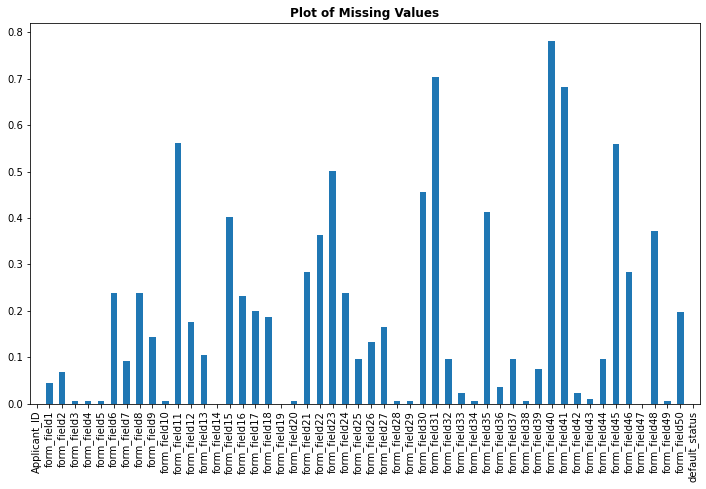

In [9]:
plt.figure(figsize=(12, 7))
(train.isnull().sum()/len(train)).plot.bar()
plt.title("Plot of Missing Values", weight="bold", size=12);

## EDA

In [10]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [7]:
profile1 = ProfileReport(train.iloc[:, 0:20])

In [8]:
profile1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

            Checking if the class is balance/n


C:\Users\CARNOT\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


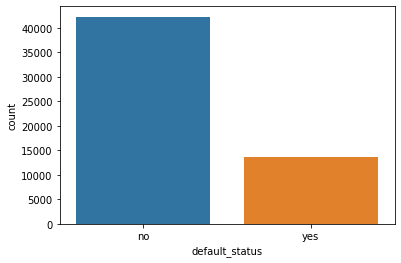

In [19]:
print('            Checking if the class is balance/n')
sns.countplot(train.default_status);

In [8]:
count = train['default_status'].value_counts()
print(count, '\n')
print(f'% of count non-fraud 0: {(count.iloc[0]/len(train))*100}')
print('-'*44)
print(f'% of count non-fraud 1: {(count.iloc[1]/len(train))*100}')

no     42285
yes    13715
Name: default_status, dtype: int64 

% of count non-fraud 0: 75.50892857142857
--------------------------------------------
% of count non-fraud 1: 24.491071428571427


## Generating the target or output and onehotencoding the output

In [9]:
y = train.iloc[:,-1]
mapping = {i:k for i, k in zip(y.unique(), range(len(y.unique())))}
y = y.map(mapping)

## Generating the input 
*onehotencoding the string input for form_field47

In [10]:
X = train.drop(['Applicant_ID', 'default_status'], 1)
mapping_ = {i:k for i, k in zip(X['form_field47'].unique(), 
                                range(len(X['form_field47'].unique())))}
X['form_field47'] = X['form_field47'].map(mapping_)
for val in X.columns:
    X[val] = X[val].fillna(X[val].median())

## Normalization

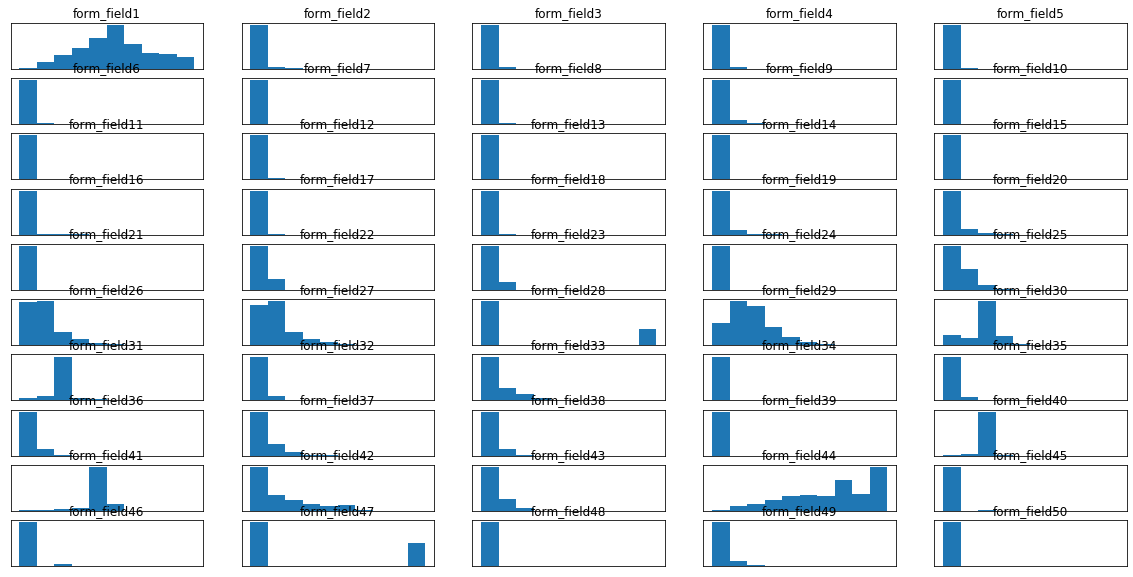

In [11]:
fig, axes = plt.subplots(10, 5, figsize = (20, 10), subplot_kw={'xticks':(), 'yticks': ()})
for ax, i in zip(axes.ravel(), X.columns):
    ax.hist(X[i])
    ax.set_title(i)

In [12]:
sc = StandardScaler()
X_std = sc.fit_transform(X.values)

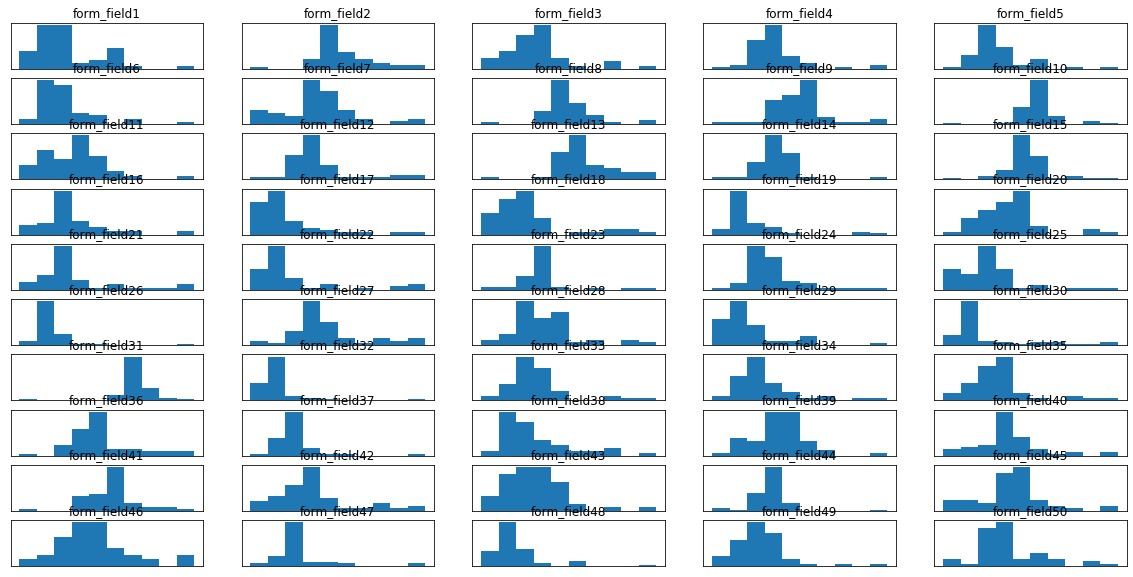

In [13]:
fig, axes = plt.subplots(10, 5, figsize = (20, 10), subplot_kw={'xticks':(), 'yticks': ()})
for ax, i, j in zip(axes.ravel(), X_std, X.columns):
    ax.hist(i)
    ax.set_title(j)

## FEATURE SECLECTION

In [14]:
skb = SelectKBest(score_func = f_classif, k = 30)
X_best = skb.fit_transform(X_std, y)
X_best.shape

(56000, 30)

## TRAINING WITH THE ORGINAL DATA

*Spitting the train data
*Transforming the train data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y.values,
                                                    random_state = 1, stratify = y.values)

In [16]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_predlog = log.predict(X_test)
print('roc_auc_score: ',roc_auc_score(y_test, y_predlog))

roc_auc_score:  0.6668539875583065


In [17]:
rfc = RandomForestClassifier(random_state= 1)
rfc.fit(X_train, y_train)
y_predrfc = rfc.predict(X_test)
print('roc_auc_score: ',roc_auc_score(y_test, y_predrfc))

roc_auc_score:  0.6705547890296388


## Oversampling Data

*Splitting the data

In [18]:
oversample_data = SMOTE(random_state= 4)
X_oversample, y_oversample = oversample_data.fit_resample(X_std, y.values)

In [19]:
SSS = StratifiedShuffleSplit(test_size = 0.2, random_state= 40)
for trainindex, testindex in SSS.split(X_oversample, y_oversample):
    X_train_oversample, X_test_oversample = X_oversample[trainindex], X_oversample[testindex]
    y_train_oversample, y_test_oversample = y_oversample[trainindex], y_oversample[testindex]

## Training the oversampled data

In [20]:
log_oversample = LogisticRegression()
log_oversample.fit(X_train_oversample, y_train_oversample)
y_predlogover = log_oversample.predict(X_test_oversample)
print('roc_auc_score: ', roc_auc_score(y_test_oversample, y_predlogover))

roc_auc_score:  0.7502660517914154


In [21]:
rfc_oversample = RandomForestClassifier(random_state= 1)
rfc_oversample.fit(X_train_oversample, y_train_oversample)
y_predrfcover = rfc_oversample.predict(X_test_oversample)
print('roc_auc_score: ',roc_auc_score(y_test_oversample, y_predrfcover))

roc_auc_score:  0.864490954239092


In [22]:
ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train_oversample, y_train_oversample)
y_predada = ada.predict(X_test_oversample)
print('roc_auc_score: ',roc_auc_score(y_test_oversample, y_predada))

roc_auc_score:  0.7936620551022822


In [23]:
vote3 = VotingClassifier(estimators=[('ada', ada), ('rcf', rfc_oversample), ('lr', log_oversample)], voting= 'soft' )
vote3.fit(X_train_oversample, y_train_oversample)
y_predvote = vote3.predict(X_test_oversample)
print('roc_auc_score: ',roc_auc_score(y_test_oversample, y_predvote))

roc_auc_score:  0.8220409128532576


In [24]:
votesoft = VotingClassifier(estimators=[('AD', ada), ('rcf', rfc_oversample)], voting= 'soft' )
votesoft.fit(X_train_oversample, y_train_oversample)
y_predvote = votesoft.predict(X_test_oversample)
print('roc_auc_score: ',roc_auc_score(y_test_oversample, y_predvote))

roc_auc_score:  0.8632493792124867


## Striking a balance between the class 1 and class 0

In [25]:
over = SMOTE(sampling_strategy= 0.6)
under = RandomUnderSampler(sampling_strategy= 0.5)

In [26]:
X_over, y_over = over.fit_resample(X_std, y)
X_under, y_under = under.fit_resample(X_std, y)
print(Counter(y_over), Counter(y_under))

Counter({0: 42285, 1: 25371}) Counter({0: 27430, 1: 13715})


In [27]:
over_concat = pd.concat([pd.DataFrame(X_over), y_over], axis = 1)
under_concat = pd.concat([pd.DataFrame(X_under), y_under], axis = 1)

new_data = pd.concat([over_concat[over_concat['default_status'] == 1], 
                      under_concat[under_concat['default_status'] == 0]])

new_data = new_data.sample(frac= 1, random_state=20)

print(new_data.shape)

(52801, 51)


In [28]:
X_new, y_new = np.array(new_data.iloc[:,:-1]), np.array(new_data.iloc[:, -1])

In [29]:
for trainindex, testindex in SSS.split(X_new, y_new):
    X_train_new, X_test_new = X_new[trainindex], X_new[testindex]
    y_train_new, y_test_new = y_new[trainindex], y_new[testindex]

In [30]:
rfc_new = RandomForestClassifier(random_state= 1)
rfc_new.fit(X_train_new, y_train_new)
y_predrfcnew = rfc_new.predict(X_test_new)
print('roc_auc_score: ',roc_auc_score(y_test_new, y_predrfcnew))

roc_auc_score:  0.8114150304671631


##               PREDICTING FOR THE TEST DIRECTORY

In [31]:
test_file = os.path.join(dir_name, test_dir)
test_data = pd.read_csv(test_file)
print(test_file)
test_data.head()

C:\Users\BOLAJI\Desktop\DSN_WORK\r\test.csv


,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [32]:
Apid = test_data['Applicant_ID']
X_unknown = test_data.drop(['Applicant_ID'], 1)
mapping_ = {i:k for i, k in zip(X_unknown['form_field47'].unique(), 
                                range(len(X_unknown['form_field47'].unique())))}
X_unknown['form_field47'] = X_unknown['form_field47'].map(mapping_)
for val in X_unknown.columns:
    X_unknown[val] = X_unknown[val].fillna(X_unknown[val].median())

In [33]:
X_std_unknown = sc.transform(X_unknown.values)

In [34]:
y_pred = log.predict(X_std_unknown)
y_pred = pd.Series(y_pred, name= 'predicted_status')
output = pd.concat([Apid, y_pred], axis = 1)
output.to_csv('predict_log_orginal.csv', index = False)

In [35]:
y_pred = rfc.predict(X_std_unknown)
y_pred = pd.Series(y_pred, name= 'predicted_status')
output = pd.concat([Apid, y_pred], axis = 1)
output.to_csv('predict_rfc_orginal.csv', index = False)

In [36]:
y_pred = log_oversample.predict(X_std_unknown)
y_pred = pd.Series(y_pred, name= 'predicted_status')
output = pd.concat([Apid, y_pred], axis = 1)
output.to_csv('predict_log_oversampled.csv', index = False)

In [37]:
y_pred = rfc_oversample.predict(X_std_unknown)
y_pred = pd.Series(y_pred, name= 'predicted_status')
output = pd.concat([Apid, y_pred], axis = 1)
output.to_csv('predict_rfc_oversampled.csv', index = False)

In [38]:
y_pred = vote3.predict(X_std_unknown)
y_pred = pd.Series(y_pred, name= 'predicted_status')
output = pd.concat([Apid, y_pred], axis = 1)
output.to_csv('predict_vote3_oversampled.csv', index = False)

In [39]:
y_pred = votesoft.predict(X_std_unknown)
y_pred = pd.Series(y_pred, name= 'predicted_status')
output = pd.concat([Apid, y_pred], axis = 1)
output.to_csv('predict_votesoft_oversampled.csv', index = False)

In [40]:
y_pred = rfc_new.predict(X_std_unknown)
y_pred = pd.Series(y_pred, name= 'predicted_status')
output = pd.concat([Apid, y_pred], axis = 1)
output.to_csv('predict_rfc_balanced.csv', index = False)